In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/cleaned_texts_oct19_2016.tsv', sep='\t')

In [3]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug,full_text_slug
0,0,0,1000686,chao,NaN,"sauvajon, marc-gilbert",escelicer,madrid,1972,NaN,fre,"madrid,spain",madrid,spain,"chao,sauvajon, marc-gilbert","chao,sauvajon, marc-gilbert,madrid,1972,escelicer"


In [4]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

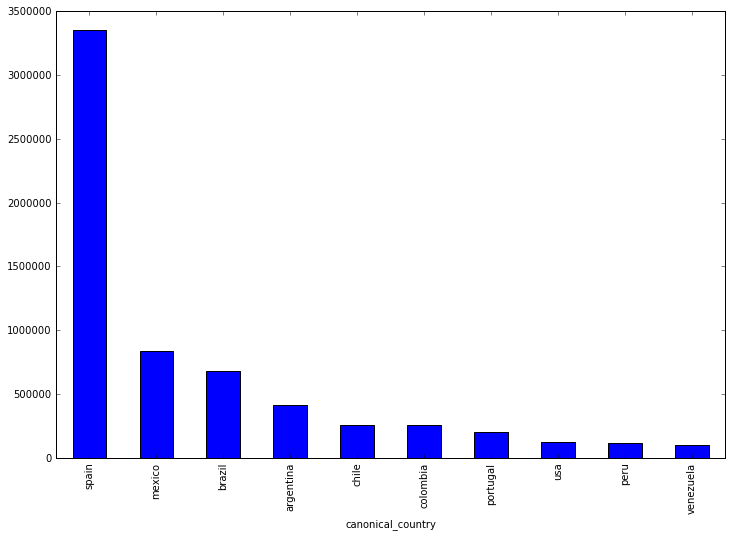

In [8]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")
plt.savefig('images/fig1_overall_places.png')

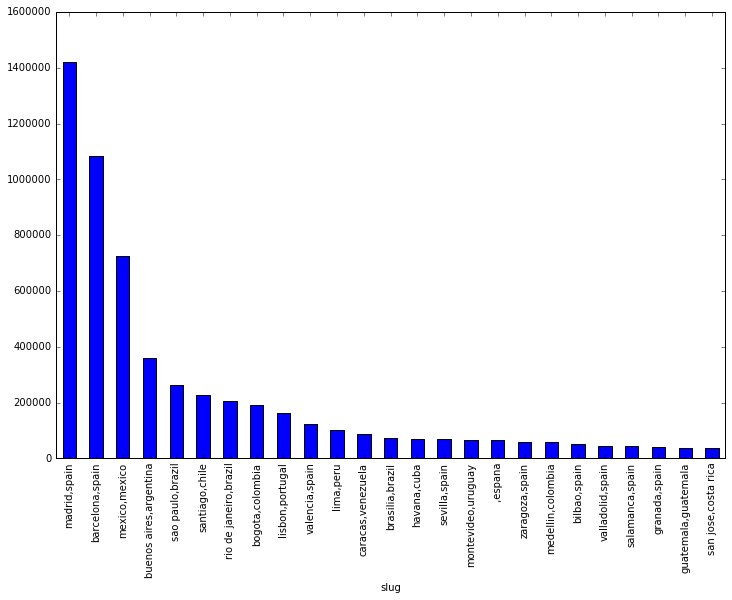

In [9]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")
plt.savefig('images/fig2_overall_cities.png')

## Global Publication By Year

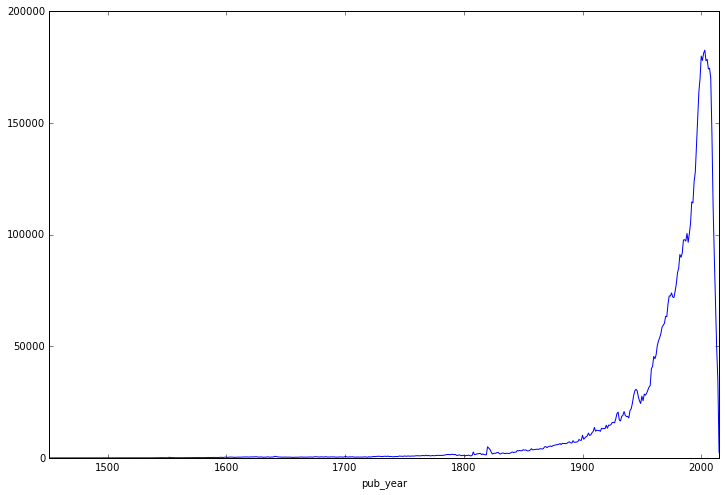

In [10]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()
plt.savefig('images/fig3_pub_by_year.png')

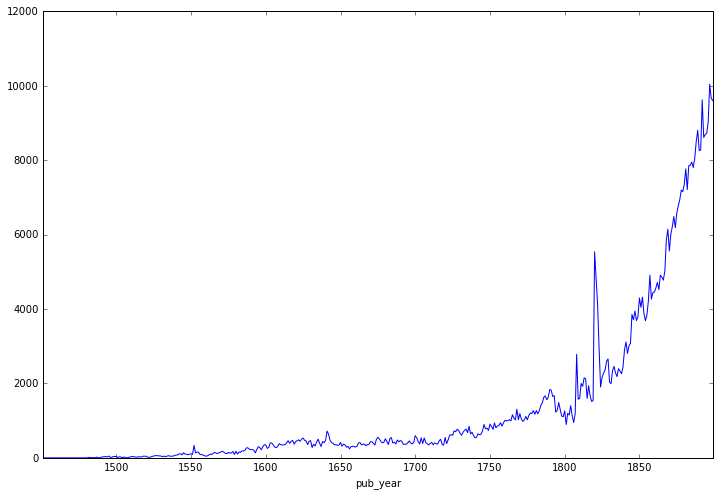

In [8]:
records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

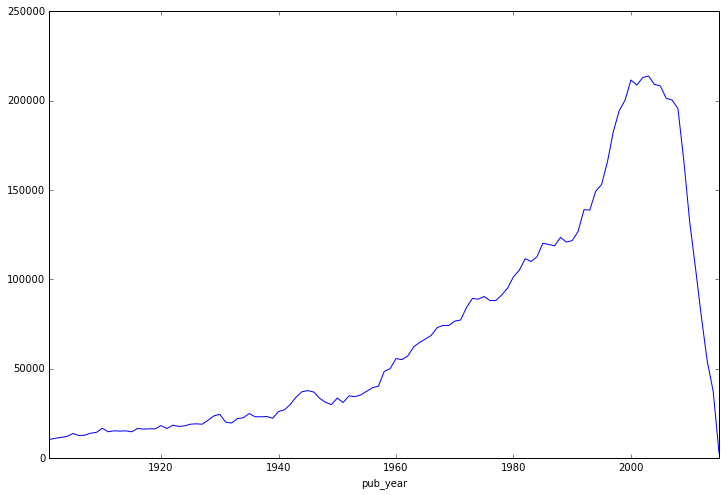

In [9]:
records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [12]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index

In [13]:
top_producers = records[records.slug.isin(top_slugs)]

In [14]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [16]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'mexico,mexico': group_top_producers.ix['mexico,mexico'],
    'buenos aires,argentina': group_top_producers.ix['buenos aires,argentina'],
    'sao paulo,brazil': group_top_producers.ix['sao paulo,brazil'],
    'santiago,chile': group_top_producers.ix['santiago,chile'],
    'rio de janeiro,brazil': group_top_producers.ix['rio de janeiro,brazil'],
    'bogota,colombia': group_top_producers.ix['bogota,colombia'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'valencia,spain': group_top_producers.ix['valencia,spain'],
}).fillna(0)

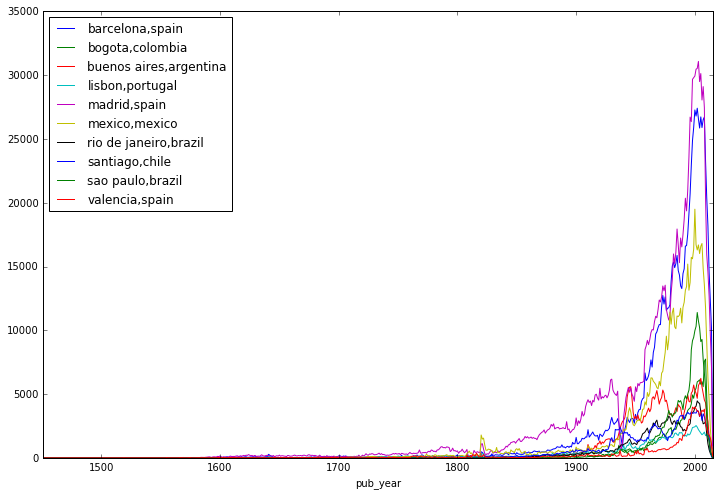

In [17]:
top_producer_df.plot()
plt.savefig('images/fig4_top_producers_by_year.png')

In [15]:
top_pre_1900_producers = top_producers[top_producers.pub_year < 1900]
group_top_pre_1900_producers = top_pre_1900_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']
top_pre_1900_producer_df = pd.DataFrame({
    'madrid,spain': group_top_pre_1900_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_pre_1900_producers.ix['barcelona,spain'],
    'mexico,mexico': group_top_pre_1900_producers.ix['mexico,mexico'],
    'buenos aires,argentina': group_top_pre_1900_producers.ix['buenos aires,argentina'],
    'sao paulo,brazil': group_top_pre_1900_producers.ix['sao paulo,brazil'],
    'santiago,chile': group_top_pre_1900_producers.ix['santiago,chile'],
    'rio de janeiro,brazil': group_top_pre_1900_producers.ix['rio de janeiro,brazil'],
    'bogota,colombia': group_top_pre_1900_producers.ix['bogota,colombia'],
    'lisbon,portugal': group_top_pre_1900_producers.ix['lisbon,portugal'],
    'valencia,spain': group_top_pre_1900_producers.ix['valencia,spain'],
})

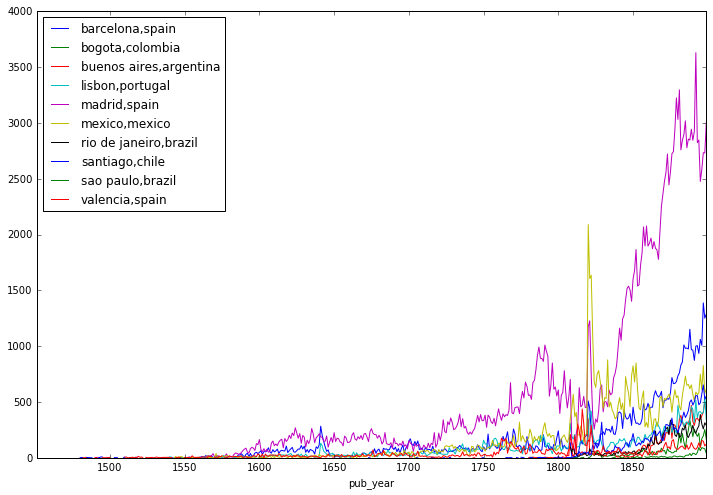

In [16]:
top_pre_1900_producer_df.plot()

In [17]:
top_post_1900_producers = top_producers[top_producers.pub_year > 1900]
group_top_post_1900_producers = top_post_1900_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']
top_post_1900_producer_df = pd.DataFrame({
    'madrid,spain': group_top_post_1900_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_post_1900_producers.ix['barcelona,spain'],
    'mexico,mexico': group_top_post_1900_producers.ix['mexico,mexico'],
    'buenos aires,argentina': group_top_post_1900_producers.ix['buenos aires,argentina'],
    'sao paulo,brazil': group_top_post_1900_producers.ix['sao paulo,brazil'],
    'santiago,chile': group_top_post_1900_producers.ix['santiago,chile'],
    'rio de janeiro,brazil': group_top_post_1900_producers.ix['rio de janeiro,brazil'],
    'bogota,colombia': group_top_post_1900_producers.ix['bogota,colombia'],
    'lisbon,portugal': group_top_post_1900_producers.ix['lisbon,portugal'],
    'valencia,spain': group_top_post_1900_producers.ix['valencia,spain'],
})

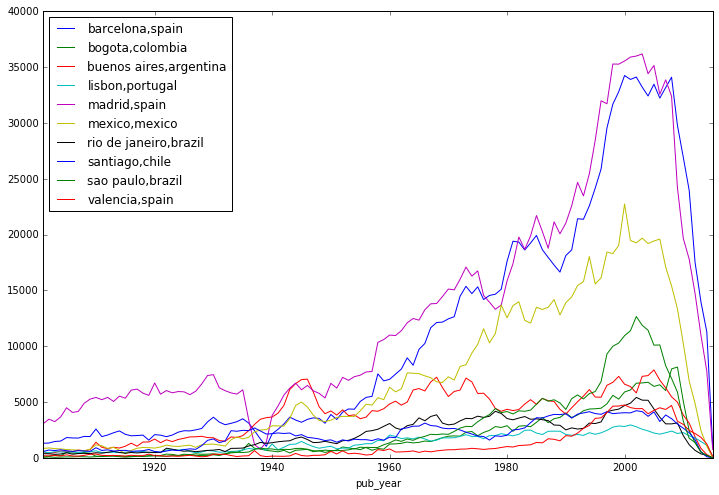

In [18]:
top_post_1900_producer_df.plot()

In [21]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']
len(counted_by_year.values)

544

In [27]:
len(top_producer_df)

533

In [29]:
top_producer_df

,"barcelona,spain","bogota,colombia","buenos aires,argentina","lisbon,portugal","madrid,spain","mexico,mexico","rio de janeiro,brazil","santiago,chile","sao paulo,brazil","valencia,spain"
pub_year,,,,,,,,,,
1451,0,0,0,0,1,0,0,0,0,0
1452,0,0,0,0,0,0,0,0,1,0
1463,0,0,0,0,0,1,0,0,0,0
1480,1,0,0,0,0,0,0,0,0,0
1481,4,0,0,0,0,0,0,0,0,0
1482,2,0,0,0,0,0,0,0,0,1
1483,0,0,0,0,0,0,0,0,0,1
1484,4,0,0,0,0,0,0,0,0,4
1488,1,0,0,0,0,0,0,0,0,0


In [30]:
# top_producer_df_percent = pd.DataFrame({
#     'madrid,spain': top_producer_df['madrid,spain'].divide(counted_by_year.values),
#     'barcelona,spain': top_producer_df['barcelona,spain'].divide(counted_by_year.values),
#     'mexico,mexico': top_producer_df['mexico,mexico'].divide(counted_by_year.values),
#     'buenos aires,argentina': top_producer_df['buenos aires,argentina'].divide(counted_by_year.values),
#     'sao paulo,brazil': top_producer_df['sao paulo,brazil'].divide(counted_by_year.values),
#     'santiago,chile': top_producer_df['santiago,chile'].divide(counted_by_year.values),
#     'rio de janeiro,brazil': top_producer_df['rio de janeiro,brazil'].divide(counted_by_year.values),
#     'bogota,colombia': top_producer_df['bogota,colombia'].divide(counted_by_year.values),
#     'lisbon,portugal': top_producer_df['lisbon,portugal'].divide(counted_by_year.values),
#     'valencia,spain': top_producer_df['valencia,spain'].divide(counted_by_year.values),
# })

In [ ]:
# top_producer_df_percent.plot.area(stacked=False)